# Red Wine Quality - Vino Verde (Portugal)

## Problem Statement

To predict quality of red wines based on physicochemical tests. 

http://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data range: May 2004 –February 2007


In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing, neighbors, grid_search, linear_model, cross_validation, metrics, feature_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join('..', 'dataset', 'winequality-red.csv'))

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

A description of the dataset is as follows:

    fixed acidity in g/dm3
    volatile acidity in g/dm3
    citric acid in g/dm3
    residual sugar in g/dm3
    chlorides in g/dm3
    free sulfur dioxide in g/dm3
    total sulfur dioxide in g/dm3
    density in g/cm3
    pH
    sulphates in g/dm3
    alcohol in % vol.
    quality is the rating score

Quality is the dependent variable. 

## EDA - Exploratory Data Analysis

$$ Cleaning data 
$$ Checking for null values in the dataset

In [5]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [7]:
df.isnull().sum().sum()

0

   Clean data frame. No null values

In [8]:
df.shape

(1599, 12)

In [9]:
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

Replacing space with under score

In [10]:
df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

In [11]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

To check distribution of variable to see if they are normally distributed or not


Todo: plot histograms, scatter plot and qqplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118bd0690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11be359d0>]], dtype=object)

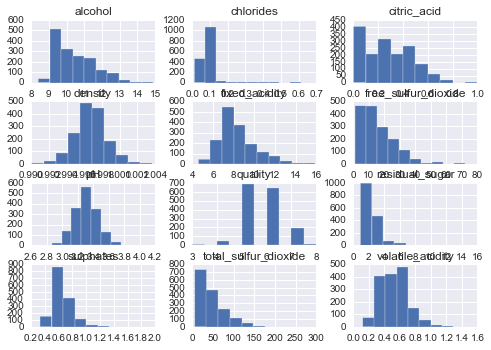

In [12]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11be4fe50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123353ad0>]], dtype=object)

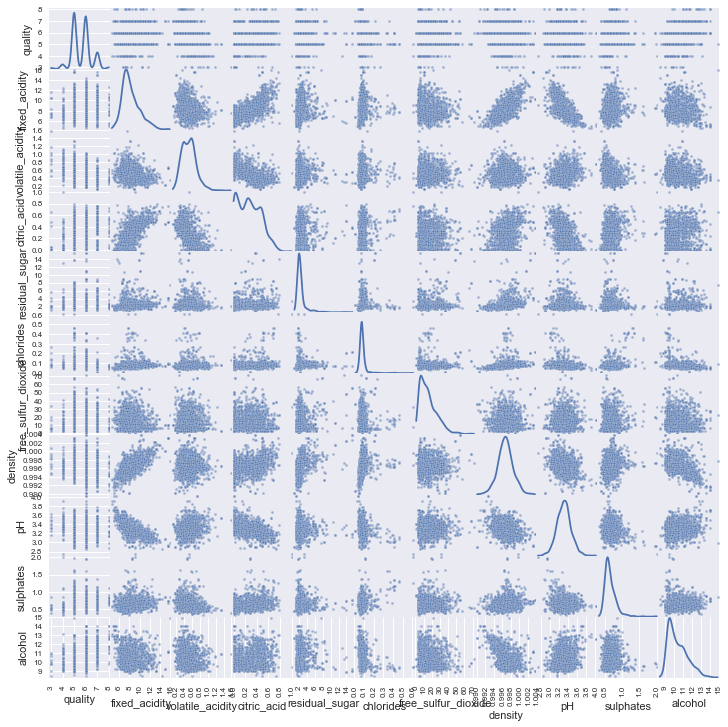

In [13]:
pd.tools.plotting.scatter_matrix(df[ ['quality', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','density','pH', 'sulphates','alcohol'] ], diagonal = 'kde', s = 30, figsize = (12, 12))

In [14]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Finding correlation

In [15]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


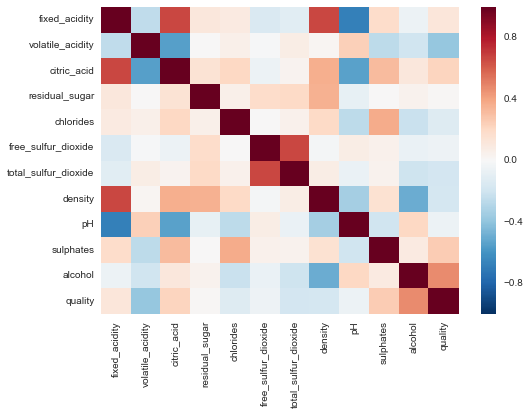

In [16]:
sns.heatmap(df.corr())

In [17]:
df.var()

fixed_acidity              3.031416
volatile_acidity           0.032062
citric_acid                0.037947
residual_sugar             1.987897
chlorides                  0.002215
free_sulfur_dioxide      109.414884
total_sulfur_dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [18]:
df.corr().quality.sort_values(ascending = False).head()

quality          1.000000
alcohol          0.476166
sulphates        0.251397
citric_acid      0.226373
fixed_acidity    0.124052
Name: quality, dtype: float64

From the table above & correlation, alcohol, sulphates,citric acid, and fixed acidity are the ones which have correlation with quality. 

## Model - Multiple Linear Regression

Because of the normal distribution of the variables I will be using Linear Regression, Decision Tree and PCA to predict which phisicochemical variable(s) would have the most effect in the quality of red wines.

In [19]:
df.quality.value_counts(dropna = False).sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

RED WINE QUALITY| 3 |4 | 5 | 6| 7| 8
---|---|---|---|---
`Value Count`|10 |53| 681 | 638 |199 |18


Boxplot to look for outliers, range of data

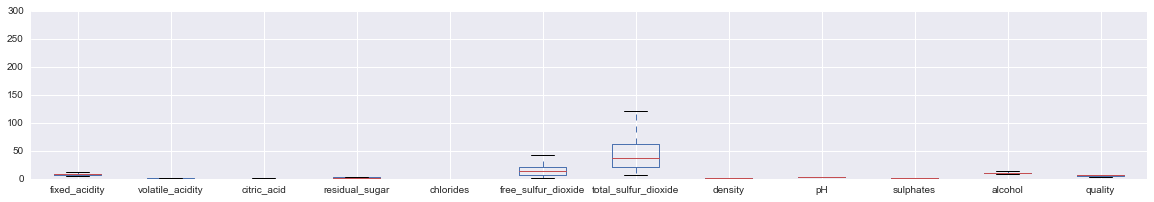

In [20]:
df.plot(kind = 'box', figsize = (20, 3), grid= True )

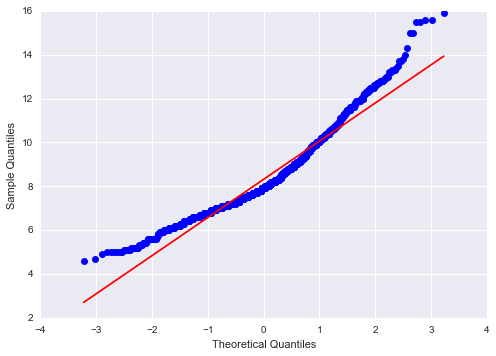

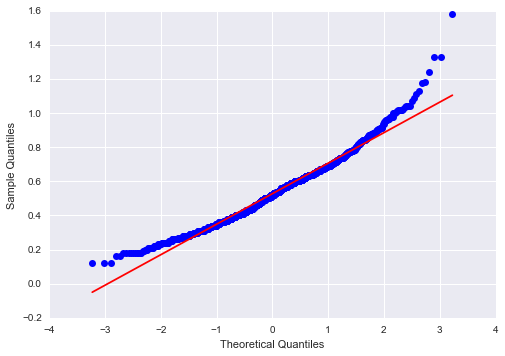

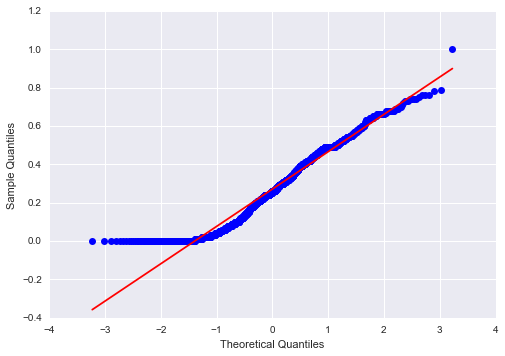

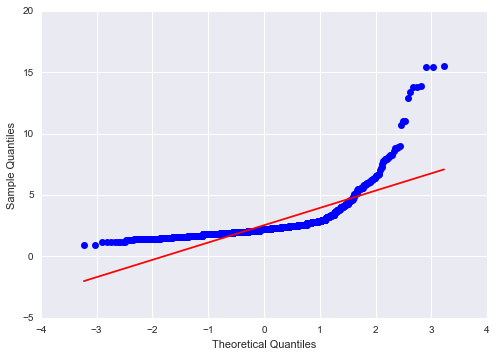

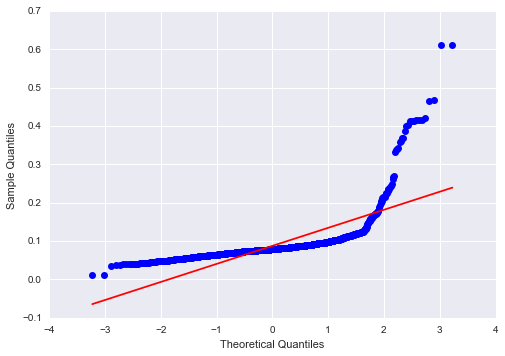

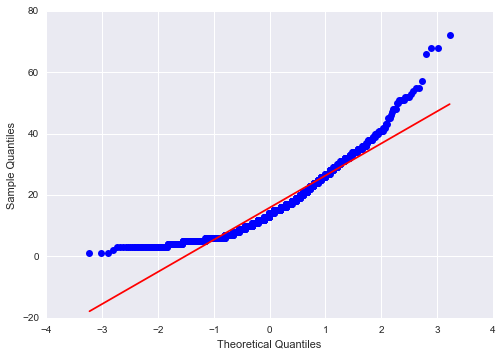

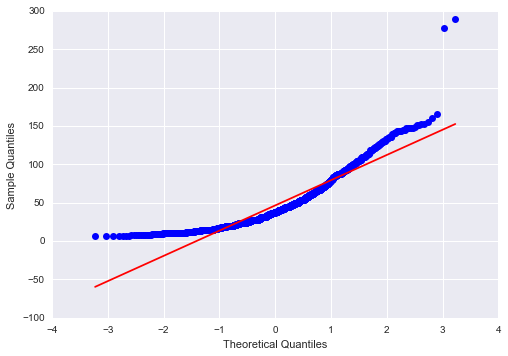

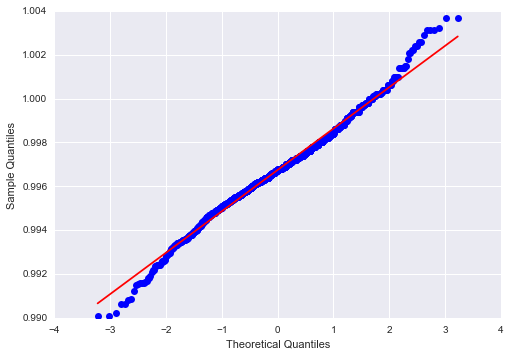

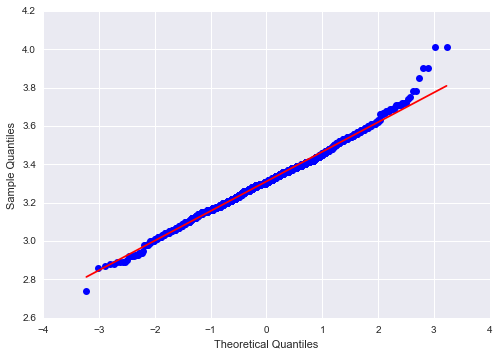

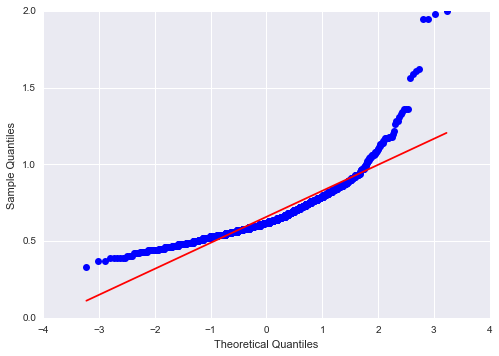

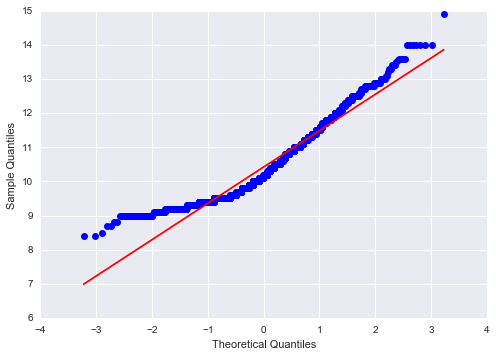

In [21]:
sm.qqplot(df.fixed_acidity, line = 's')
sm.qqplot(df.volatile_acidity, line = 's')
sm.qqplot(df.citric_acid, line = 's')
sm.qqplot(df.residual_sugar, line = 's')
sm.qqplot(df.chlorides, line = 's')
sm.qqplot(df.free_sulfur_dioxide, line = 's')
sm.qqplot(df.total_sulfur_dioxide, line ='s')
sm.qqplot(df.density, line ='s')
sm.qqplot(df.pH, line = 's')
sm.qqplot(df.sulphates, line = 's')
sm.qqplot(df.alcohol, line = 's')

pass

## Train/Test set

         Splitting data 

In [22]:
X = df.drop('quality', axis= 1)

In [23]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [24]:
y = df.quality

In [25]:
y

0       5
1       5
2       5
3       6
4       5
5       5
       ..
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [27]:
print len (X_train)
print len (X_test)
print len (y_train)
print len (y_test)

959
640
959
640


In [28]:
X_train.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol'],
      dtype='object')

In [29]:
print(X_train.shape, y_train.shape)

((959, 11), (959,))


## Statsmodel

Running Mulitple Linear Regression using statsmodel 


Some issues to keep in mind:

1. multicollinearity - can affect coefficients
2. autocorrelation - possible to remove highly correlated predictors 
3. outliers

In [30]:
X_train_constant = sm.add_constant(X_train)
X_train_model = sm.OLS(y_train, X_train_constant).fit()

X_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     55.13
Date:                Tue, 15 Nov 2016   Prob (F-statistic):           5.31e-94
Time:                        15:17:40   Log-Likelihood:                -942.98
No. Observations:                 959   AIC:                             1910.
Df Residuals:                     947   BIC:                             1968.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   13.5342     26.977      0.502      0.616       -39.407    66.475
fixed_acidity           -0.0136      0.033     -0.407      0.684        -0.079     0.052
volatile_acidity        -1.1867      0.152     -7.820      0.000        -1.485    -0.889
citric_acid              0.0188      0.193      0.097      0.922        -0.360     0.398
residual_sugar           0.0290      0.018      1.585      0.113        -0.007     0.065
chlorides               -2.3259      0.500     -4.652      0.000        -3.307    -1.345
free_sulfur_dioxide   5.168e-05      0.003      0.019      0.985        -0.005     0.005
total_sulfur_dioxide    -0.0030      0.001     -3.360      0.001        -0.005    -0.001
density                 -8.6345     27.533     -0.314      0.754       -62.668    45.399
pH                      -0.5279      0.247     -2.139      0.033        -1.012    -0.044
sulphates                0.9039      0.142      6.351      0.000         0.625     1.183
alcohol                  0.2792      0.034      8.311      0.000         0.213     0.345
==============================================================================
Omnibus:                       10.227   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.061
Skew:                          -0.161   Prob(JB):                      0.00240
Kurtosis:                       3.446   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysis of statsmodel: To be statistical significant (to reject the Null Hyphotesis)

F statistics =  55.13 (> 4 to be considered useful)
p < 0.05, t > 2 and C.I. dont' cross 0

Interpreting the intercept (β0):
it is not statistically significant. Is it b/c of multicollinearity? i.e. Chloride & Sulphates; Alcohol & pH

Interpreting the coeficients (β1):
variables that are statistical significant:
1. volatile_acidity
2. chlorides
3. total_sulfur_dioxide
4. pH
5. sulphates
6. alcohol

## Sklearn model

Using Sklearn to predict the quality using only the variables that are statisticaly significant

In [36]:
# these are the coefficients of regression line 
X_train = df[ [ 'volatile_acidity', 'chlorides','total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol'] ]
y_train = df.quality

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print model.intercept_
print model.coef_

4.29573156564
[-1.03819452 -2.00228386 -0.00237213 -0.43518301  0.88868016  0.2906738 ]


In [37]:
# Variable and p value
zip(X_train.columns.values, feature_selection.f_regression(X_train, y_train)[1])

[('volatile_acidity', 2.0517148070142153e-59),
 ('chlorides', 2.3133826540590474e-07),
 ('total_sulfur_dioxide', 8.6217034236582139e-14),
 ('pH', 0.020962778651477412),
 ('sulphates', 1.8020884534526884e-24),
 ('alcohol', 2.8314769792405462e-91)]

Coefficients that are significant > 5% (95% CI):
Volatile_acidity, Chlorides, Total_Sulfur_Dioxide, Sulphates, and Alcohol 

In [38]:
# Model R2 
model.score(X_train, y_train)

0.35717364800915907

Slklearn model capture 36% of the variability in quality and Stats model 39%.

Running Statsmodel with four variables

In [44]:
def Xy_train(df):
    X = df[ ['volatile_acidity', 'chlorides','sulphates','pH','total_sulfur_dioxide', 'alcohol'] ]

    y = df.quality
    
    X_constant = sm.add_constant(X)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_constant, y, test_size=0.4, random_state=0)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = Xy_train(df)

model = smf.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 15 Nov 2016   Prob (F-statistic):           6.93e-98
Time:                        16:40:33   Log-Likelihood:                -945.11
No. Observations:                 959   AIC:                             1904.
Df Residuals:                     952   BIC:                             1938.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    4.4821      0.515      8.700      0.000         3.471     5.493
volatile_acidity        -1.1904      0.126     -9.467      0.000        -1.437    -0.944
chlorides               -2.1742      0.466     -4.670      0.000        -3.088    -1.261
sulphates                0.8644      0.136      6.379      0.000         0.599     1.130
pH                      -0.4419      0.151     -2.924      0.004        -0.739    -0.145
total_sulfur_dioxide    -0.0026      0.001     -4.037      0.000        -0.004    -0.001
alcohol                  0.2908      0.022     13.372      0.000         0.248     0.333
==============================================================================
Omnibus:                        9.759   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.612
Skew:                          -0.150   Prob(JB):                      0.00301
Kurtosis:                       3.447   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

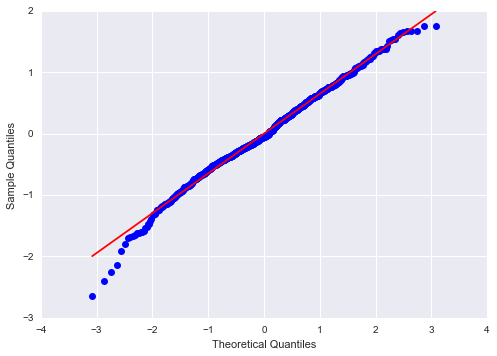

In [45]:
sm.qqplot(model.resid, line = 's')

pass

## Summary

Stats model using all variables capture 39% of the variability in quality while the Slklearn model 36%.

Using the variable that are most correlated (volatile_acidity, chlorides, total_sulfur_dioxide, pH, sulphates and alcohol the variablity decrease just a little to 38.8%